#### Teoría de Circuitos II

# Tarea Semanal 4

#### Por Nahuel Braian Contreras

### Actividad
Los cáclulos del ejercicios se realizaron en OneNote

In [1]:
from IPython.display import IFrame
IFrame("TS4.pdf", width=900, height=900)

Para verificar la cuentas, varios puntos fueron hechos junto con python

nn 1 - alfa_min_cheby 6.666245
nn 2 - alfa_min_cheby 22.821879
nn 3 - alfa_min_cheby 40.139185
nn 4 - alfa_min_cheby 57.481240
Como tengo mi alfa tiene que se mayor a 16 uso n=3
nn 1 - alfa_min_cheby 8.923278
nn 2 - alfa_min_cheby 28.383828
nn 3 - alfa_min_cheby 48.509554
nn 4 - alfa_min_cheby 68.642265
Como tengo mi alfa tiene que se mayor a 24 uso n=2


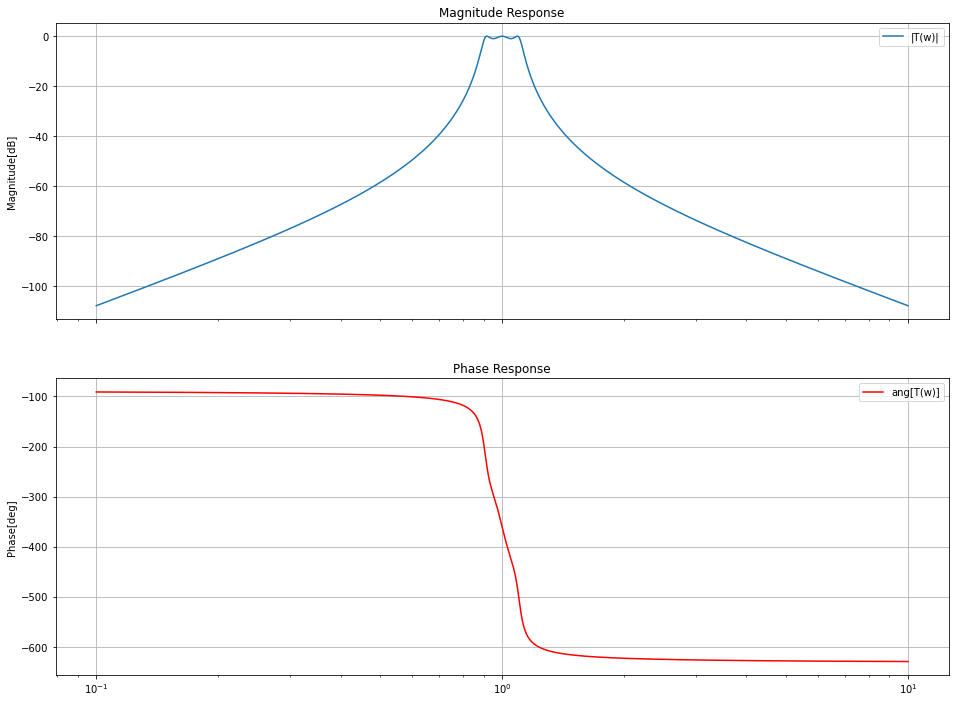

In [2]:
import math as m
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt


# DATOS
f_0  = 22e3
f_s1 = 17e3
f_s2 = 36e3
Q = 5
alfa_s1 = 16
alfa_s2 = 24
alfa_max = 1

# Calculo de las frecuancias de paso
fp1_12 = np.roots([1, f_0/Q, -f_0**2]) #nos quedamos con el positivo
f_p1 = fp1_12[1]
f_p2 = f_0/Q + f_p1

# Normalizacion en frecuencia
w_0_n  = 1
w_s1_n = f_s1/f_0
w_s2_n = f_s2/f_0
w_p1_n = f_p1/f_0
w_p2_n = f_p2/f_0

# Frecuencias equivalentes en pasabajo
Omega_p1 = Q * (w_p1_n ** 2 - 1) / w_p1_n
Omega_p2 = Q * (w_p2_n ** 2 - 1) / w_p2_n
Omega_s1 = Q * (w_s1_n ** 2 - 1) / w_s1_n
Omega_s2 = Q * (w_s2_n ** 2 - 1) / w_s2_n

# Calculo de parametros para equivalente pasabajo
ee = 10**(alfa_max/10)-1

e = m.sqrt(ee)

# Caso Omega_s1
for nn in range(1,5):
    alfa_min = 10*np.log10(1 + ee * np.cosh(nn * np.arccosh(abs(45/12)))**2 )  
    print( 'nn {:d} - alfa_min_cheby {:f}'.format(nn, alfa_min))
print("Como tengo mi alfa tiene que se mayor a %d" %alfa_s1,"uso n=3")
    
# Caso Omega_s2
for nn in range(1,5):
    alfa_min = 10*np.log10(1 + ee * np.cosh(nn * np.arccosh(Omega_s2))**2 )
    print( 'nn {:d} - alfa_min_cheby {:f}'.format(nn, alfa_min))
print("Como tengo mi alfa tiene que se mayor a %d" %alfa_s2,"uso n=2")

# Elijo el n que cumpla ambas condiciones --> n = 3

# Calculo de las raices
A = ee*16

raices_lp = np.roots([-1, -0, -24*ee/A, -0, -9*ee/A, -0, 1/A])
#raices = [ -0.2471 + 0.9660j , -0.2471 - 0.9660j]


r1_lp = raices_lp[4]
r2_lp = [raices_lp[0], raices_lp[1]]
rt_lp = [raices_lp[0], raices_lp[1], raices_lp[4]] #raices totales

#coeficientes del denominador del pasabajo
p1_lp = np.poly(r2_lp)
pt_lp = np.poly(rt_lp)


# transformo el pasabajo en pasabanda

# constantes de transferencias pasa banda
a = abs(r1_lp); b = p1_lp[2]; c = (2*Q**2+b)

num = [1/(4*e*Q**3), 0, 0, 0];
den1 = [1, a/Q, 1]; #poly bp orden 2
den2 = [1, a/Q, c/Q**2, a/Q, 1]; #poly bp orden 4

#voy a dividir el polinomio de orden 4 en dos de orden 2
# encuentro sus raices
raices_bp = np.roots(den2)

#Divido el par de polos en dos secciones diferentes
r1_bp = [raices_bp[0], raices_bp[1]]
r2_bp = [raices_bp[2], raices_bp[3]]

#Encuentro los coeficientes del polinomio asociado a esos pares de polos
p1_bp = np.poly(r1_bp)
p2_bp = np.poly(r2_bp)

den = np.convolve(den1, den2)


den_aux1 = np.convolve(den1,p1_bp)
den_aux2 = np.convolve(den_aux1,p2_bp)

#sys = sig.TransferFunction([1/(4*e)], pt_lp)
sys = sig.TransferFunction(num, den)
f = np.logspace(-1, 1,10000)
w, mag, phase = sig.bode(sys,f)
fig, (ax1,ax2) = plt.subplots(nrows=2 , ncols=1, sharex=True)
fig.set_size_inches(16,12)
ax1.semilogx(w,mag,label='|T(w)|')
ax1.grid(True)
ax1.set_title('Magnitude Response')
ax1.set_ylabel('Magnitude[dB]')
ax1.legend()

ax2.semilogx(w, phase,color='red',label='ang[T(w)]')
ax2.grid(True)
ax2.set_title('Phase Response')
ax2.set_ylabel('Phase[deg]')
ax2.legend()

### Circuito

Se opto por dividir la ganancia total de igual manera en cada de las secciones ya que, como se explica en el capitulo 5 del SCHAUMANN, se cuida la relacion señal a ruido, ademas de que nos permite usar la estructura GIC sin el atenuador en la entrada, ya que cada una gana mas de 2 veces
<img src="Circuito.png">

### Gráfico

Podemos ver que el cirucito total cumple con las especificaciones de la plantilla, teniendo para 17KHz una atenuacion de 26.4dB superior a la pedida(24dB) y para 36KHz, una atenuacion de 45.56dB, tambien mayor a la solicitada(36dB)
<img src="Grafico_plantilla.png">

En este grafico, vemos que el ripple maximo en la banda de paso es muy cercano a los 0.5dB, con la forma caracterisitca de los filtros Chebyshev
<img src="Grafico_ripple.png">

Aca podemos ver como cada una de las estrucutras tiene una ganancia asociada, pero todas ellas se compensan de tal manera de obtener un pasabanda chebyshev de 0db de ganancia
<img src="Grafico_aporte.png">